In [65]:
# Import libraries necessary for this project
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Load the wholesale customers dataset
try:
    dir = os.getcwd()
    in_file = dir + '/customers.csv'
    data = pd.read_csv(in_file)
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    # Success - Display the first five records
    # display(data.head())
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")


# Display a description of the dataset
display(data.describe())


print("\n", end='')
print("\n", end='')
# TODO: Select three indices of your choice you wish to sample from the dataset
# indices = np.random.randint(low = 0, high = 440, size = 3)  # 隨機產生0-439之間的數 取三個
indices = [231, 409, 181]
print("Random Indices: {}".format(indices))

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Wholesale customers dataset has 440 samples with 6 features each.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000




Random Indices: [231, 409, 181]
Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2344,10678,3828,1439,1566,490
1,8708,3634,6100,2349,2123,5137
2,112151,29627,18148,16745,4948,8550


In [66]:
print("Question 1:")
print("index 231: 牛奶與其他東西相比特別多，有可能是專賣牛奶的零售商(retailers)")
print("index 409: 熟食較多，且有買清潔用品，應該是餐廳(restaurant)")
print("index 181: 每一樣東西都很多，應該是超市(market)")

Question 1:
index 231: 牛奶與其他東西相比特別多，有可能是專賣牛奶的零售商(retailers)
index 409: 熟食較多，且有買清潔用品，應該是餐廳(restaurant)
index 181: 每一樣東西都很多，應該是超市(market)


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
# TODO: Iterate all six features
dep_vars = list(data.columns)
for var in dep_vars:
    new_data = data.copy()
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    target_label = new_data[var]
    new_data = data.drop([var], axis = 1)

    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, target_label, test_size=0.25, random_state=0)
    regressor = DecisionTreeRegressor(random_state=0)
    regressor = regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print('R2 score for {} as dependent variable: {}'.format(var, score))

R2 score for Fresh as dependent variable: -0.2524698076882732
R2 score for Milk as dependent variable: 0.36572529273630905
R2 score for Grocery as dependent variable: 0.6028019788784589
R2 score for Frozen as dependent variable: 0.2539734466970086
R2 score for Detergents_Paper as dependent variable: 0.7286551812541454
R2 score for Delicatessen as dependent variable: -11.663687159428036


In [68]:
print("Question 2:")
print("Frozen，因為Frozen分數是正的但很低，代表Frozen可以fit但不好預測，有可能是重要的特徵。")
print("0.2539")
print("是，有可能是重要的特徵。")

Question 2:
Frozen，因為Frozen分數是正的但很低，代表Frozen可以fit但不好預測，有可能是重要的特徵。
0.2539
是，有可能是重要的特徵。


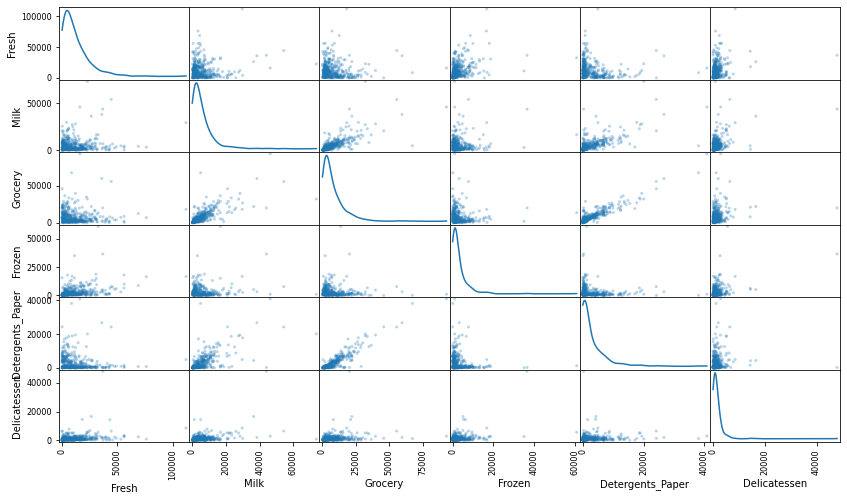

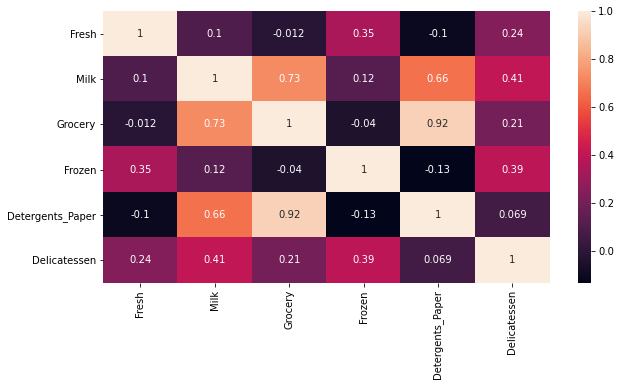

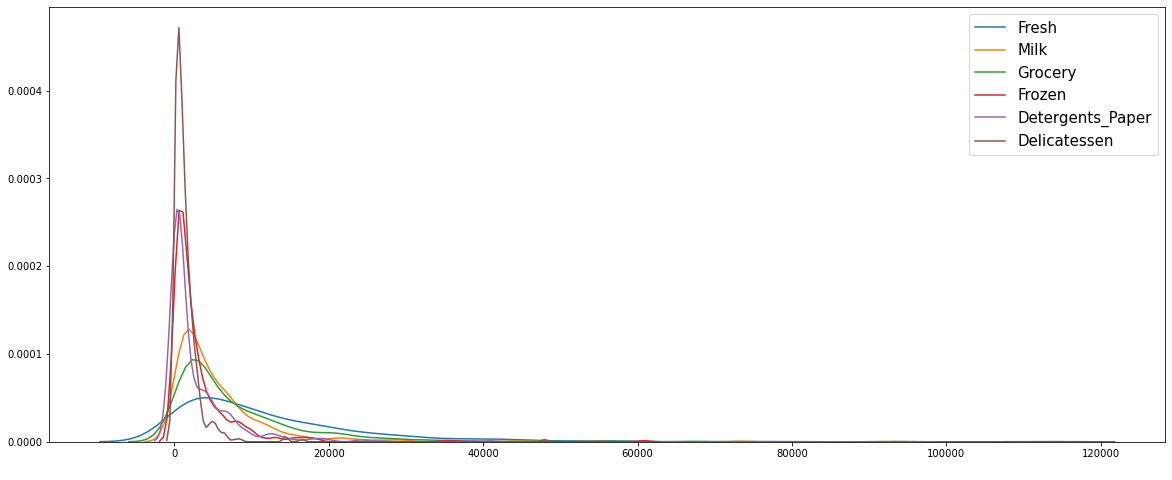

In [69]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
plt.show()

corr = data.corr()
plt.figure(figsize = (10,5))
import seaborn as sns
ax = sns.heatmap(corr, annot=True)
plt.show()

plt.figure(figsize = (20,8))
for cols in data.columns.values:
    ax = sns.kdeplot(data[cols], label=cols)
    ax.legend(loc=0, prop={'size': 15})
ax.set(xlabel=" ")
plt.show()

In [70]:
print("Question 3:")
print("Milk與Grocery和Detergents_Paper有高度相關。唯一與Frozen相關的也就只有Fresh，但數值不高。Delicatessen與任何東西都有一點關聯。")
print("確實符合我的想法，Frozen算是特別的特徵，沒有太多關聯性。")
print("資料不呈現常態分佈。")

Question 3:
Milk與Grocery和Detergents_Paper有高度相關。唯一與Frozen相關的也就只有Fresh，但數值不高。Delicatessen與任何東西都有一點關聯。
確實符合我的想法，Frozen算是特別的特徵，沒有太多關聯性。
資料不呈現常態分佈。


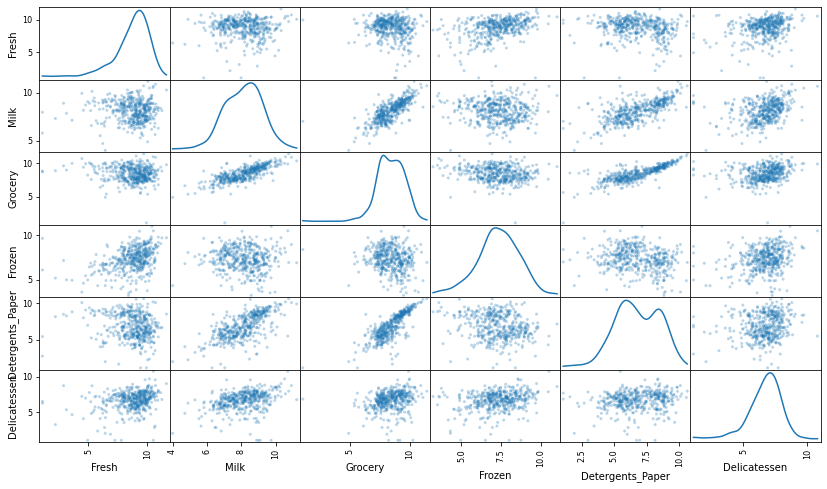

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7.759614,9.275941,8.250098,7.271704,7.356280,6.194405
1,9.071997,8.198089,8.716044,7.761745,7.660585,8.544225
2,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687


Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382



Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275



Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442



Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244



Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101



Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372



List of Outliers -> [65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 154, 38, 57, 65, 145, 175, 264, 325, 420, 429, 439, 75, 161, 66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]

List of Common Outliers -> [65, 66, 75, 128, 154]


In [71]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)
# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
plt.show()

log_samples = np.log(samples)
# Display the log-transformed sample data
display(log_samples)




# For each feature find the data points with extreme high or low values
outliers_list = []
for feature in log_data.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)

    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)

    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5  # 四分位距*1.5

    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    print("\n", end='')
    outliers = list(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.values)
    outliers_list.extend(outliers)


print("List of Outliers -> {}".format(outliers_list))
duplicate_outliers_list = list(set([x for x in outliers_list if outliers_list.count(x) >= 2]))
duplicate_outliers_list.sort()
print("\nList of Common Outliers -> {}".format(duplicate_outliers_list))

# OPTIONAL: Select the indices for data points you wish to remove
outliers = duplicate_outliers_list

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop=True)
# np.set_printoptions(threshold=1000)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(good_data)

In [72]:
print("Question 4:")
print("有，共5筆資料出現在不只一個feature中。")
print("這些資料屬於多種features，應該移除。")
print("因為k-means會被這些outliers影響，如果不將雜訊移除，可能會對後續分析出來的結果造成影響。")

Question 4:
有，共5筆資料出現在不只一個feature中。
這些資料屬於多種features，應該移除。
因為k-means會被這些outliers影響，如果不將雜訊移除，可能會對後續分析出來的結果造成影響。


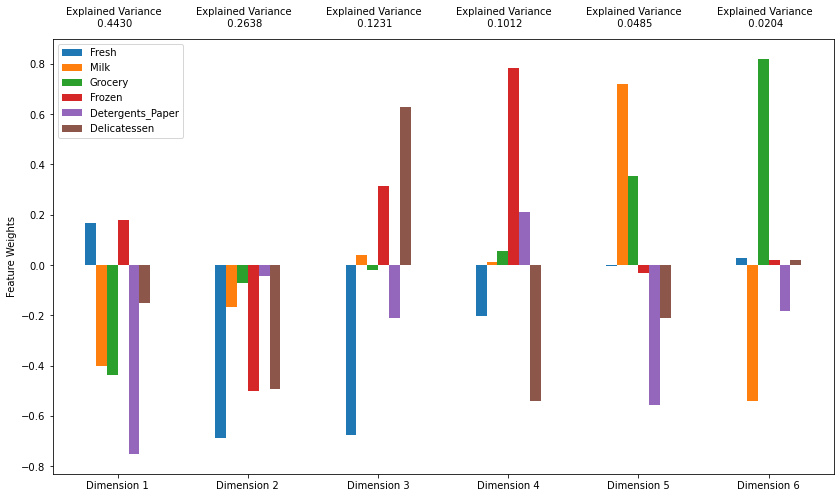

In [73]:
from sklearn.decomposition import PCA
def display_pca_results(good_data, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = display_pca_results(good_data, pca)

In [74]:
print("Question 5:")
print("1. 0.4430 + 0.2638 = 0.7068 (70%)")
print("2. 93%")
print("3.")
print("Dimension1: Detergents_Paper, Grocery, Milk有較小變異數，這些東西購買需求較大，可能為Retailer")
print("Dimension2: Fresh, Frozen, Delicatessen有較小變異數，這些東西購買需求較大，可能為Restaurant")
print("Dimension3: Fresh, Detergents_Paper有較小變異數，這些東西購買需求較大，可能為Cafe")
print("Dimension4: Fresh, Delicatessen有較小變異數，這些東西購買需求較大，可能為Cafe")

Question 5:
1. 0.4430 + 0.2638 = 0.7068 (70%)
2. 93%
3.
Dimension1: Detergents_Paper, Grocery, Milk有較小變異數，這些東西購買需求較大，可能為Retailer
Dimension2: Fresh, Frozen, Delicatessen有較小變異數，這些東西購買需求較大，可能為Restaurant
Dimension3: Fresh, Detergents_Paper有較小變異數，這些東西購買需求較大，可能為Cafe
Dimension4: Fresh, Delicatessen有較小變異數，這些東西購買需求較大，可能為Cafe


In [75]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))



# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2, random_state=0)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])



# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.8905,0.7636,0.2835,0.5551,0.5486,-0.9343
1,-0.9357,-1.4087,0.9090,-0.5265,-0.7421,0.0695
2,-2.1899,-4.8605,0.0008,0.4827,0.5041,-0.1988


,Dimension 1,Dimension 2
0,-0.8905,0.7636
1,-0.9357,-1.4087
2,-2.1899,-4.8605


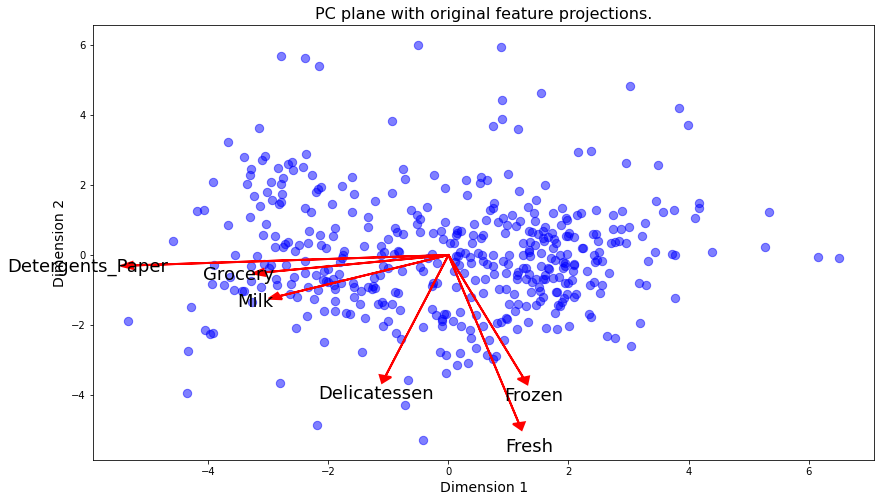

Dimension1: Detergents_Paper, Grocery, Milk, 三者都靠很近，表示三者有強烈關聯。
Dimension2: Fresh, Frozen, Delicatessen。 Fresh, Frozen快要重和，兩者之間有強烈關連性。
與前面的假設大致相同。


In [76]:
def biplot(good_data, reduced_data, pca):
    '''
    Produce a biplot that shows a scatterplot of the reduced
    data and the projections of the original features.
    
    good_data: original data, before transformation.
               Needs to be a pandas dataframe with valid column names
    reduced_data: the reduced data (the first two dimensions are plotted)
    pca: pca object that contains the components_ attribute

    return: a matplotlib AxesSubplot object (for any additional customization)
    
    This procedure is inspired by the script:
    https://github.com/teddyroland/python-biplot
    '''

    fig, ax = plt.subplots(figsize = (14,8))
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16)
    plt.show()
    return ax

# Create a biplot
biplot(good_data, reduced_data, pca)
print("Dimension1: Detergents_Paper, Grocery, Milk, 三者都靠很近，表示三者有強烈關聯。")
print("Dimension2: Fresh, Frozen, Delicatessen。 Fresh, Frozen靠很近，兩者之間有強烈關連性。")
print("與前面的假設大致相同。")

In [77]:
print("Question 6:")
print("K-Means:假想分為k群，每一群都有中心點(k個)。每個點與k個中心點比較，將每一點分類為距離最近的中心點族群，並取得交界線。")
print("經過多次運算收斂直到交界線不再變動，得到最終分類。")
print("優點:理論簡單，好實現，且效率高，適合巨量資料。")
print("Gaussian Mixture Model:將各種抽樣出來的數據形成的多個高斯分布圖形，彼此取聯及所得到的最終圖形為Gaussian Mixture Model。")
print("優點:彈性高，單筆資料可以屬於多種群集。")
print("我會選擇K-Means，因為只有6個特徵，且比較好implement。")

Question 6:
K-Means:假想分為k群，每一群都有中心點(k個)。每個點與k個中心點比較，將每一點分類為距離最近的中心點族群，並取得交界線。
經過多次運算收斂直到交界線不再變動，得到最終分類。
優點:理論簡單，好實現，且效率高，適合巨量資料。
Gaussian Mixture Model:將各種抽樣出來的數據形成的多個高斯分布圖形，彼此取聯及所得到的最終圖形為Gaussian Mixture Model。
優點:彈性高，單筆資料可以屬於多種群集。
我會選擇K-Means，因為只有6個特徵，且比較好implement。


In [78]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
    
clusters_range = range(2,5)
for i in clusters_range:
# TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=i, random_state=0 )
    clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print("silhouette coefficient for `{}` clusters => {:.4f}".format(i, score))

silhouette coefficient for `2` clusters => 0.4263
silhouette coefficient for `3` clusters => 0.3974
silhouette coefficient for `4` clusters => 0.3312


In [94]:
print("Question 7:")
print("2 clusters: 0.4263")
print("3 clusters: 0.3974")
print("4 clusters: 0.3312\n")
print("clusters 2 分數最高")

Question 7:
2 clusters: 0.4263
3 clusters: 0.3974
4 clusters: 0.3312

clusters 2 分數最高


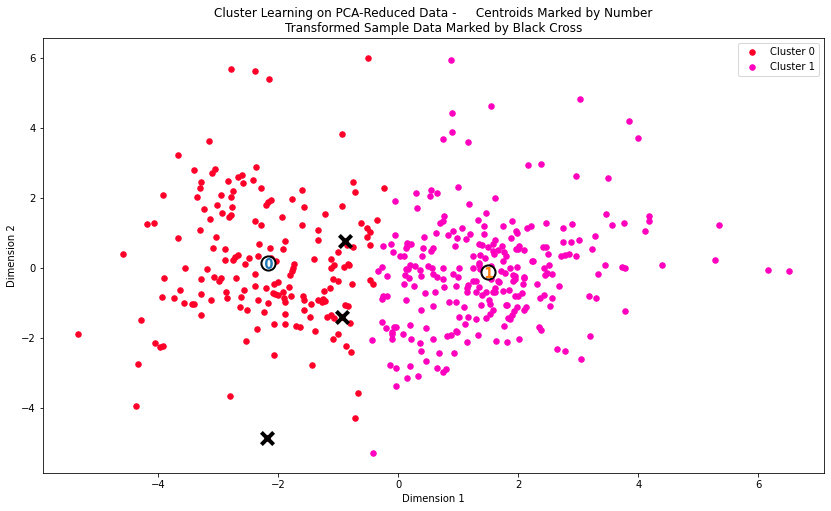

In [80]:
def cluster_results(reduced_data, preds, centers, pca_samples):
    '''
    Visualizes the PCA-reduced cluster data in two dimensions
    Adds cues for cluster centers and student-selected sample data
    '''

    predictions = pd.DataFrame(preds, columns = ['Cluster'])
    plot_data = pd.concat([predictions, reduced_data], axis = 1)

    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (14,8))

    # Color map
    cmap = cm.get_cmap('gist_rainbow')

    # Color the points based on assigned cluster
    for i, cluster in plot_data.groupby('Cluster'):   
        cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30)

    # Plot centers with indicators
    for i, c in enumerate(centers):
        ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', alpha = 1, linewidth = 2, marker = 'o', s=200)
        ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100)

    # Plot transformed sample points 
    ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
               s = 150, linewidth = 4, color = 'black', marker = 'x')

    # Set plot title
    ax.set_title("Cluster Learning on PCA-Reduced Data - \
    Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross")
    
# Display the results of the clustering from implementation
clusterer = KMeans(n_clusters = 2)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(pca_samples)
cluster_results(reduced_data, preds, centers, pca_samples)

In [81]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4005.0,7900.0,12104.0,952.0,4561.0,1036.0
Segment 1,8867.0,1897.0,2477.0,2088.0,294.0,681.0


In [82]:
print("Question 8:")
print("Segment 0: Milk, Grocery, Detergents_paper高於平均水準，可能為market。")
print("Segment 1: Fresh接近平均水準，可能為restaurant。")

Question 8:
Segment 0: Milk, Grocery, Detergents_paper高於平均水準，可能為market。
Segment 1: Fresh接近平均水準，可能為restaurant。


In [93]:
display(samples)
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

print("\n", end='')
print("Question 9:")
print("sample 0, 1: 分別為Milk, Grocery高於平均開頭提及的mean values，可能為market。")
print("Segment 2: 各樣東西都很多，所以被歸類為market。也許只有Fresh特別多，其他都很少的情況才會屬於restaurant。")

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2344,10678,3828,1439,1566,490
1,8708,3634,6100,2349,2123,5137
2,112151,29627,18148,16745,4948,8550


Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0

Question 9:
sample 0, 1: 分別為Milk, Grocery高於平均開頭提及的mean values，可能為market。
Segment 2: 各樣東西都很多，所以被歸類為market。也許只有Fresh特別多，其他都很少的情況才會屬於restaurant。


In [85]:
print("Question 10:")
print("wholesale distributor應該以customer segments模型分辨出哪類型的顧客是屬於segment 1(餐飲業)，因為餐飲業喜歡Fresh。")
print("以segment 1為目標增加一個禮拜的進貨次數可以得到好的回饋。")

Question 10:
wholesale distributor應該以customer segments模型分辨出哪類型的顧客是屬於segment 1(餐飲業)，因為餐飲業喜歡Fresh。
以segment 1為目標增加一個禮拜的進貨次數可以得到好的回饋。


In [86]:
print("Question 11:")
print("target value是customer segment，藉由新來的顧客所有六項的消費指數形成x_train去預測target value，藉此知道是哪一型態的消費者。")

Question 11:
target value是customer segment，藉由新來的顧客所有六項的消費指數形成x_train去預測target value，藉此知道是哪一型態的消費者。


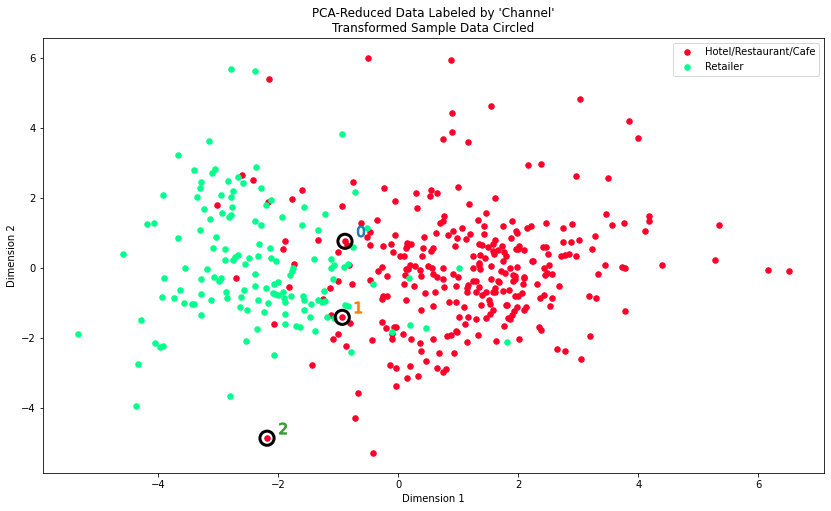

In [88]:
def channel_results(reduced_data, outliers, pca_samples):
    '''
    Visualizes the PCA-reduced cluster data in two dimensions using the full dataset
    Data is labeled by "Channel" and cues added for student-selected sample data
    '''

    # Check that the dataset is loadable
    try:
        full_data = pd.read_csv(in_file)
    except:
        print("Dataset could not be loaded. Is the file missing?")       
        return False

    # Create the Channel DataFrame
    channel = pd.DataFrame(full_data['Channel'], columns = ['Channel'])
    channel = channel.drop(channel.index[outliers]).reset_index(drop = True)
    labeled = pd.concat([reduced_data, channel], axis = 1)
    
    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (14,8))

    # Color map
    cmap = cm.get_cmap('gist_rainbow')

    # Color the points based on assigned Channel
    labels = ['Hotel/Restaurant/Cafe', 'Retailer']
    grouped = labeled.groupby('Channel')
    for i, channel in grouped:   
        channel.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
                     color = cmap((i-1)*1.0/2), label = labels[i-1], s=30);
    
    # Plot transformed sample points   
    for i, sample in enumerate(pca_samples):
        ax.scatter(x = sample[0], y = sample[1], \
                s = 200, linewidth = 3, color = 'black', marker = 'o', facecolors = 'none');
        ax.scatter(x = sample[0]+0.25, y = sample[1]+0.3, marker='$%d$'%(i), alpha = 1, s=125);

    # Set plot title
    ax.set_title("PCA-Reduced Data Labeled by 'Channel'\nTransformed Sample Data Circled");

# Display the clustering results based on 'Channel' data
channel_results(reduced_data, outliers, pca_samples)

In [ ]:
print("Question 12:")
print("雖然圖形交界處變得更亂了，但結果仍與上面一樣是屬於右半邊的restaurant。")
print("以目前的圖形來看，只要是在極左或極右的地方還是會被分類到正確的分類。")
print("我認為與先前定義一致。")